In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Prepare for Dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
           'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl',
           'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can',
           'castle', 'caterpillar', 'cattle', 'chair', 
           'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch',
           'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 
           'elephant', 'flatfish', 'forest', 'fox', 'girl', 
           'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 
           'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
           'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
           'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 
           'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 
           'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',
           'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 
           'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 
           'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
           'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
           'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 
           'wolf', 'woman', 'worm')

#classes = ('plane', 'car', 'bird', 'cat',
#           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


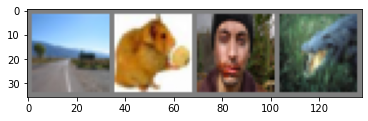

 road hamster   man crocodile


In [3]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Choose a Device

In [4]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cpu


#### Network Definition

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.relu3 = nn.ReLU()
        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 100)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x
        
        

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu1): ReLU()
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu2): ReLU()
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu3): ReLU()
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=1024, out_features=100, bias=True)
)

#### Optimizer and Loss Function

In [6]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9) 

In [7]:
label_values = torch.unique(torch.tensor(trainset.targets))
print(label_values)



tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])


#### Training Procedure

In [ ]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 4.605
[epoch: 0, i:   199] avg mini-batch loss: 4.605
[epoch: 0, i:   299] avg mini-batch loss: 4.606
[epoch: 0, i:   399] avg mini-batch loss: 4.603
[epoch: 0, i:   499] avg mini-batch loss: 4.602
[epoch: 0, i:   599] avg mini-batch loss: 4.601
[epoch: 0, i:   699] avg mini-batch loss: 4.600
[epoch: 0, i:   799] avg mini-batch loss: 4.600
[epoch: 0, i:   899] avg mini-batch loss: 4.604
[epoch: 0, i:   999] avg mini-batch loss: 4.604
[epoch: 0, i:  1099] avg mini-batch loss: 4.598
[epoch: 0, i:  1199] avg mini-batch loss: 4.593
[epoch: 0, i:  1299] avg mini-batch loss: 4.591
[epoch: 0, i:  1399] avg mini-batch loss: 4.593
[epoch: 0, i:  1499] avg mini-batch loss: 4.595
[epoch: 0, i:  1599] avg mini-batch loss: 4.589
[epoch: 0, i:  1699] avg mini-batch loss: 4.586
[epoch: 0, i:  1799] avg mini-batch loss: 4.588
[epoch: 0, i:  1899] avg mini-batch loss: 4.571
[epoch: 0, i:  1999] avg mini-batch loss: 4.579
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 3.352
[epoch: 1, i:  4799] avg mini-batch loss: 3.340
[epoch: 1, i:  4899] avg mini-batch loss: 3.337
[epoch: 1, i:  4999] avg mini-batch loss: 3.280
[epoch: 1, i:  5099] avg mini-batch loss: 3.288
[epoch: 1, i:  5199] avg mini-batch loss: 3.246
[epoch: 1, i:  5299] avg mini-batch loss: 3.302
[epoch: 1, i:  5399] avg mini-batch loss: 3.339
[epoch: 1, i:  5499] avg mini-batch loss: 3.251
[epoch: 1, i:  5599] avg mini-batch loss: 3.292
[epoch: 1, i:  5699] avg mini-batch loss: 3.281
[epoch: 1, i:  5799] avg mini-batch loss: 3.228
[epoch: 1, i:  5899] avg mini-batch loss: 3.254
[epoch: 1, i:  5999] avg mini-batch loss: 3.296
[epoch: 1, i:  6099] avg mini-batch loss: 3.144
[epoch: 1, i:  6199] avg mini-batch loss: 3.247
[epoch: 1, i:  6299] avg mini-batch loss: 3.343
[epoch: 1, i:  6399] avg mini-batch loss: 3.216
[epoch: 1, i:  6499] avg mini-batch loss: 3.372
[epoch: 1, i:  6599] avg mini-batch loss: 3.319
[epoch: 1, i:  6699] avg mini-batch loss

#### Training Loss Curve

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
# One of the changes I made was that I added another layer in the network 
# that takes the output from the second convolutional layer, applies ReLU activation, 
# and passes it through a 2x2 AvgPool layer to capture more relationships.
# I also reduced the learning rate of the optimizer to half (0.0005) which
# which allowed the optimizer to take smaller steps towards the minimum of 
# the loss function which might allow for a better chance of finding the global min of loss.
